In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('solar_panel_classification_data.csv')
dataset

,Panel,Efficiency,Degradation,Power(W),solar_irradiance,temperature,humidity,wind_speed,cloud_cover,panel_age,panel_tilt_angle,latitude,longitude,output_category
0,Panel_C,10.50,0.26,276,234.582148,27.409992,34.203594,12.909419,47.135301,8,40,43.162039,-80.402974,low
1,Panel_C,13.35,0.95,248,701.541503,20.095389,71.946512,2.424767,98.612964,4,20,33.483335,-97.290986,medium
2,Panel_A,11.59,0.67,248,800.323062,31.027154,60.910303,12.327964,70.145991,3,10,49.220731,-93.750434,low
3,Panel_B,14.53,0.48,384,264.976616,32.347156,60.115497,14.559179,66.752851,1,30,39.840162,-87.148791,low
4,Panel_C,12.29,0.22,299,314.577546,15.657046,81.578566,6.378646,39.263899,12,50,33.434963,-123.012506,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Panel_B,18.10,0.15,302,714.936187,22.766445,21.291239,3.602661,61.595182,4,10,33.858955,-88.585466,medium
996,Panel_B,12.30,0.65,226,736.401113,24.012641,45.690515,9.612694,19.704401,18,20,28.335311,-71.953013,high
997,Panel_C,10.12,0.56,291,863.499489,16.035945,67.038076,12.090799,75.375519,21,30,38.662189,-105.852577,medium
998,Panel_B,13.77,0.28,315,738.160525,31.421819,84.590728,14.336480,3.404805,22,10,37.980271,-113.286274,high


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns

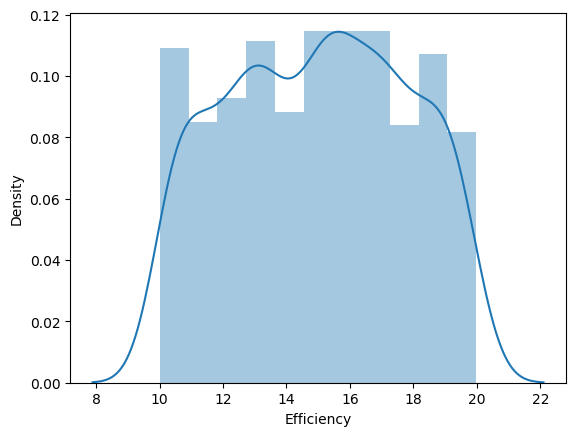

In [5]:

sns.distplot(dataset['Efficiency'])

In [6]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns          
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Green')
    
    pyplot.axvline(startrange,color='violet')
    pyplot.axvline(endrange,color='violet')
    
    sample=dataset 
    
    sample_mean=sample.mean() 
    sample_std=sample.std()
    print('Mean=%.3f,StandardDeviation=%.3f'%(sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    
    values = []
    for value in range(startrange, endrange):
        values.append(value)    
    probabilities=[]
    for value in values:
        prob = dist.pdf(value)
        probabilities.append(prob)
        prob=sum(probabilities)
    print('The area between range({},{}):{}'.format(startrange,endrange,sum(probabilities)))
    prob

Mean=14.970,StandardDeviation=2.812
The area between range(8,22):0.9864228095013104


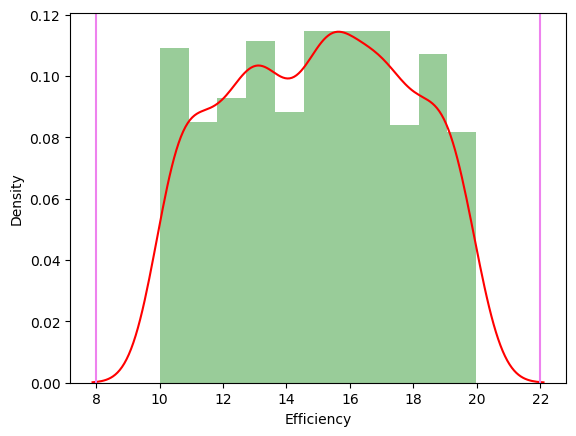

In [7]:
get_pdf_probability(dataset['Efficiency'],8,22)

In [8]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Efficiency'])
ecdf(19)

0.914

In [9]:
#z-score
def StdND_graph(dataset):
    import seaborn as sns 
    mean=dataset.mean()
    std=dataset.std()
    values=[]
    for value in dataset:
        values.append(value)
    z_score=[((j-mean)/std)for j in values]
    sns.distplot(z_score,kde=True,kde_kws={'color':'red'},color='Green')
    sum(z_score)/len(z_score)

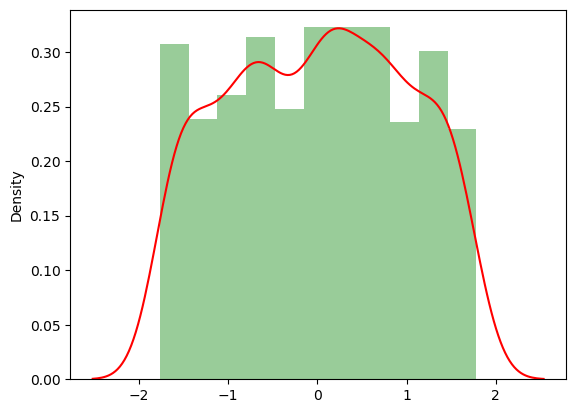

In [10]:
StdND_graph(dataset['Efficiency'])

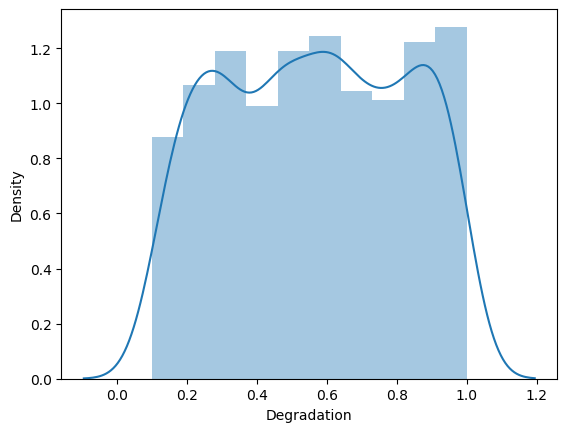

In [11]:
sns.distplot(dataset['Degradation'])

In [12]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns          
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Green')
    
    pyplot.axvline(startrange,color='violet')
    pyplot.axvline(endrange,color='violet')
    
    sample=dataset 
    
    sample_mean=sample.mean() 
    sample_std=sample.std()
    print('Mean=%.3f,StandardDeviation=%.3f'%(sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    
    start_range = int(startrange * 100)
    end_range = int(endrange * 100)
    
    values = []
    for value in range(start_range, end_range):
        
        values.append(value / 100.0)  
    #values = []
    #for value in range(startrange, endrange):
     #   values.append(value)    
    probabilities=[]
    for value in values:
        prob = dist.pdf(value)
        probabilities.append(prob)
        prob=sum(probabilities)
    print('The area between range({},{}):{}'.format(startrange,endrange,sum(probabilities)))
    prob

Mean=0.563,StandardDeviation=0.259
The area between range(0.1,0.2):4.228306427819926


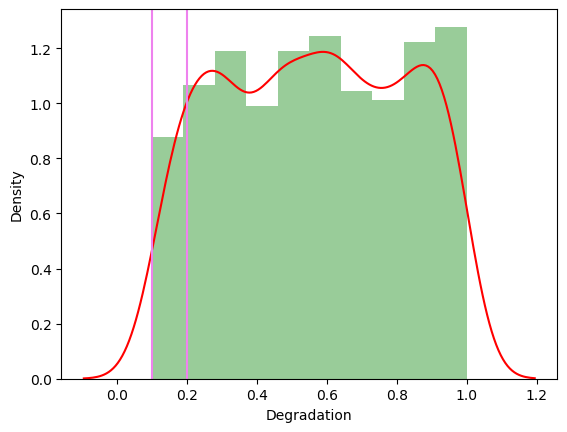

In [13]:
get_pdf_probability(dataset['Degradation'],0.1,0.2)

In [14]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Degradation'])
ecdf(18)

1.0

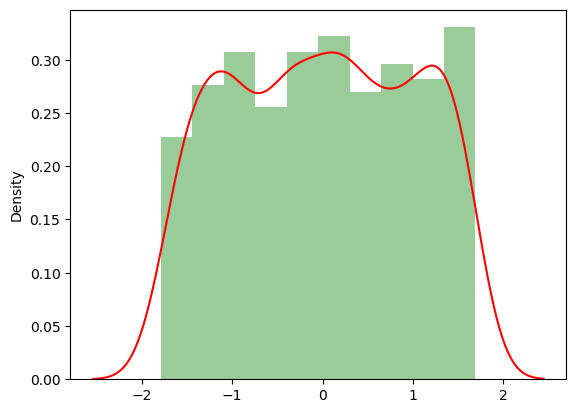

In [15]:
StdND_graph(dataset['Degradation'])

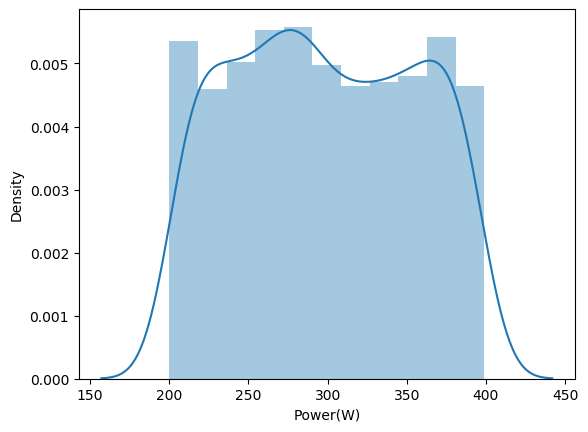

In [16]:
sns.distplot(dataset['Power(W)'])

Mean=298.438,StandardDeviation=56.935
The area between range(200,400):92.08679595642809


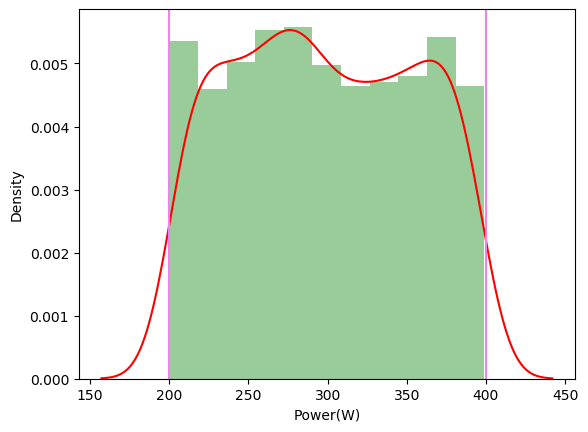

In [17]:
get_pdf_probability(dataset['Power(W)'],200,400)

In [18]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Power(W)'])
ecdf(200)

0.004

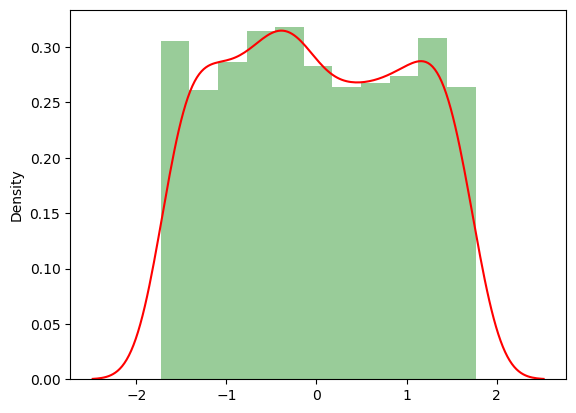

In [19]:
StdND_graph(dataset['Power(W)'])

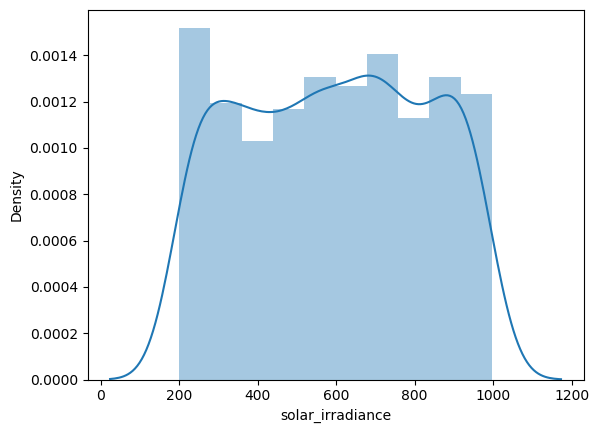

In [20]:
sns.distplot(dataset['solar_irradiance'])

Mean=595.178,StandardDeviation=233.797
The area between range(400,990):75.24582573998435


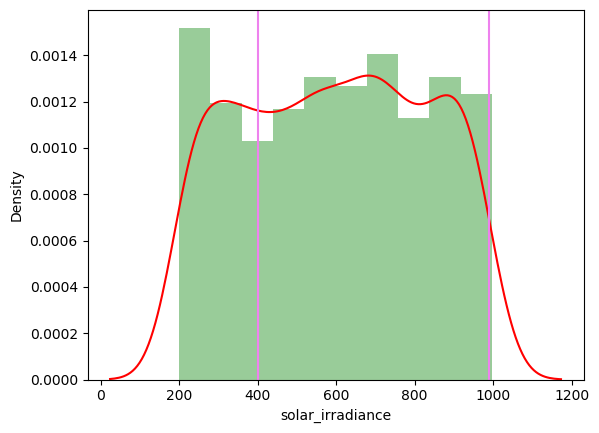

In [21]:
get_pdf_probability(dataset['solar_irradiance'],400,990)

In [22]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['solar_irradiance'])
ecdf(99)

0.0

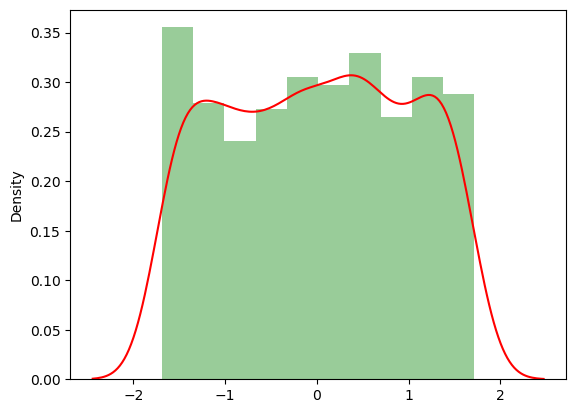

In [23]:
StdND_graph(dataset['solar_irradiance'])

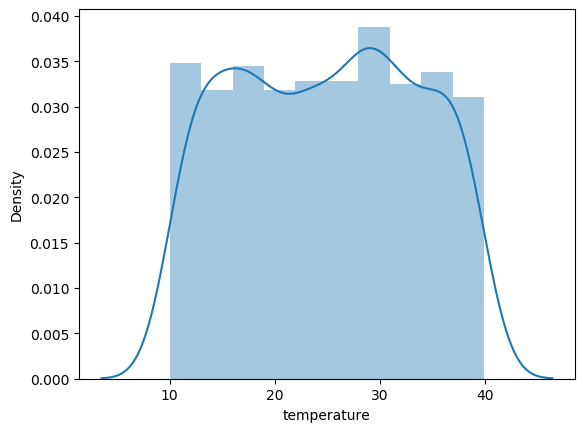

In [24]:
sns.distplot(dataset['temperature'])

Mean=24.897,StandardDeviation=8.612
The area between range(10,40):91.84465408128537


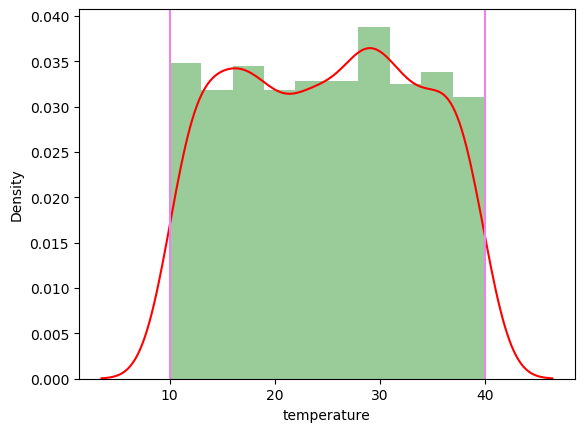

In [25]:
get_pdf_probability(dataset['temperature'],10,40)

In [26]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['temperature'])
ecdf(18)

0.275

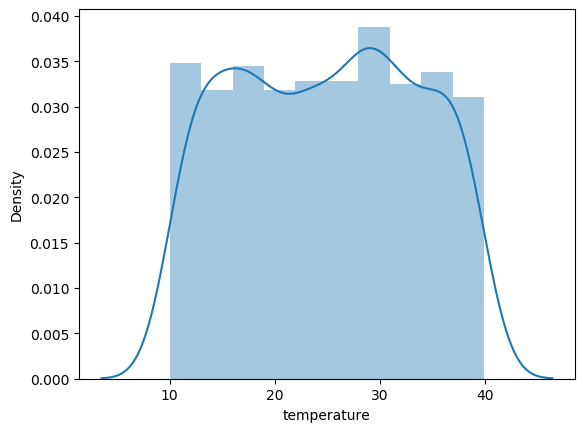

In [27]:
sns.distplot(dataset['temperature'])

Mean=50.468,StandardDeviation=23.425
The area between range(25,75):71.40377815351755


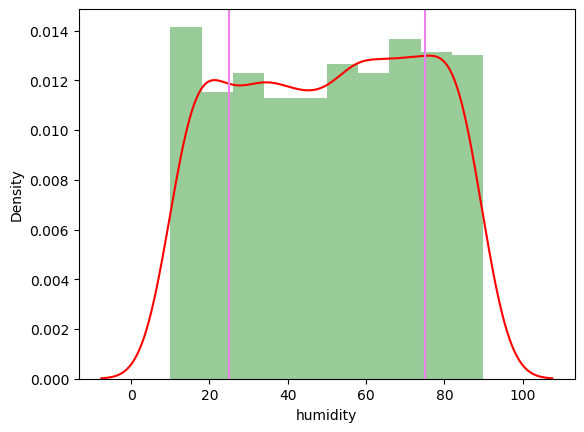

In [28]:
get_pdf_probability(dataset['humidity'],25,75)

In [29]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['humidity'])
ecdf(18)

0.113

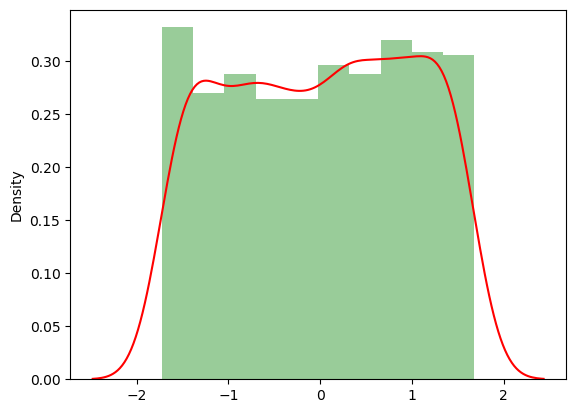

In [30]:
StdND_graph(dataset['humidity'])

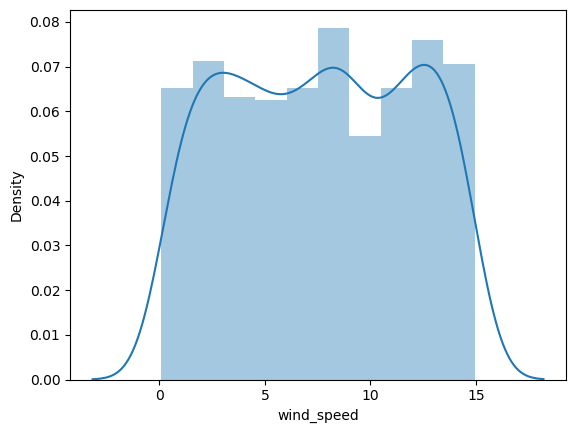

In [31]:
sns.distplot(dataset['wind_speed'])

Mean=7.612,StandardDeviation=4.315
The area between range(0,15):91.76839489776953


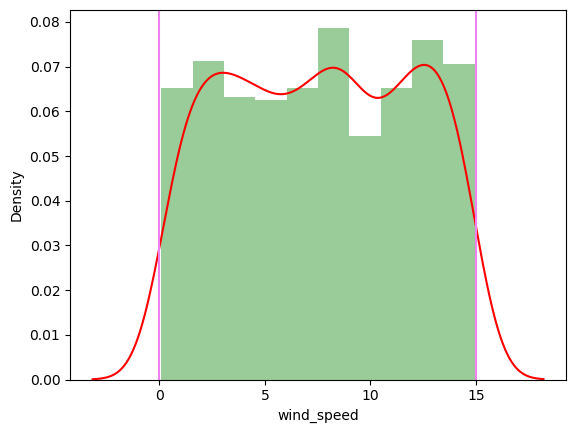

In [32]:
get_pdf_probability(dataset['wind_speed'],0,15)

In [33]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['wind_speed'])
ecdf(18)

1.0

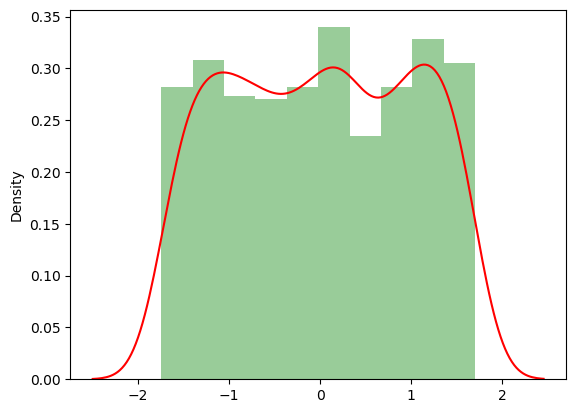

In [34]:
StdND_graph(dataset['wind_speed'])

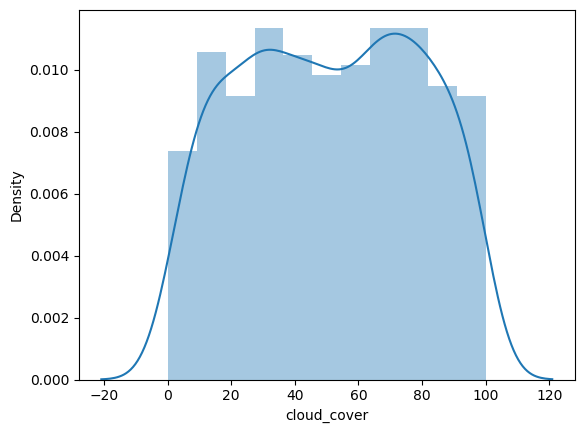

In [35]:
sns.distplot(dataset['cloud_cover'])

Mean=51.018,StandardDeviation=27.827
The area between range(0,100):92.74374749698332


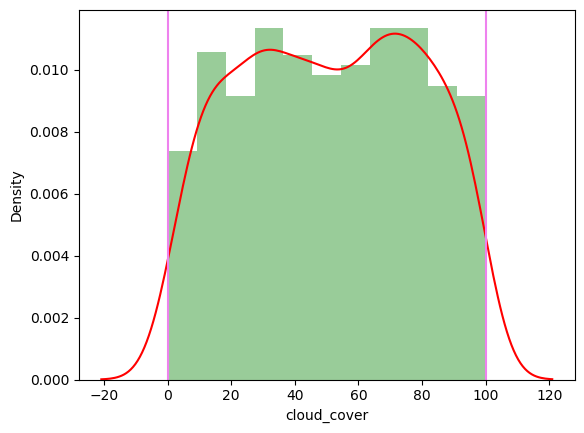

In [36]:
get_pdf_probability(dataset['cloud_cover'],0,100)

In [37]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['cloud_cover'])
ecdf(100)

1.0

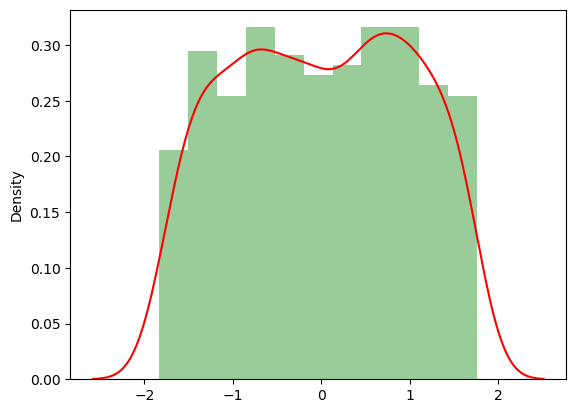

In [38]:
StdND_graph(dataset['cloud_cover'])

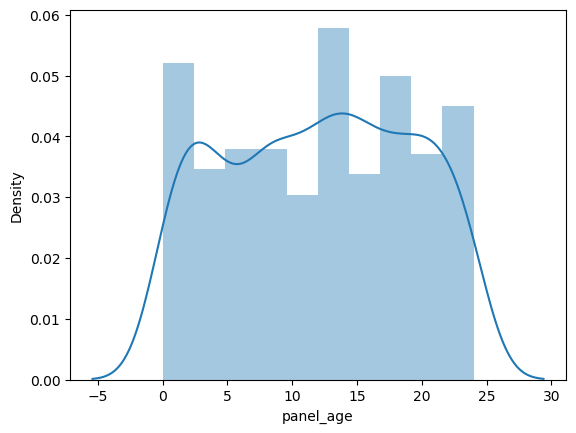

In [39]:
sns.distplot(dataset['panel_age'])

Mean=12.038,StandardDeviation=7.162
The area between range(0,24):90.61803158629647


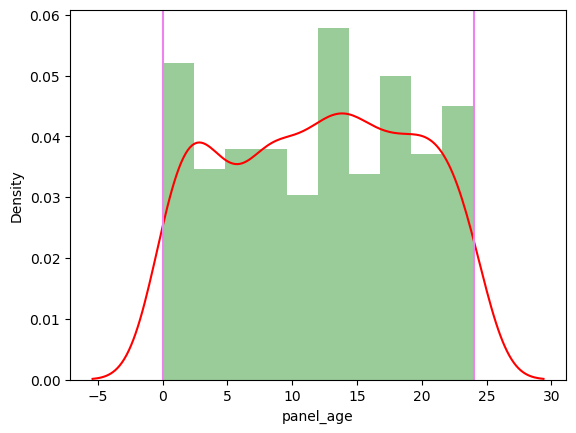

In [40]:
get_pdf_probability(dataset['panel_age'],0,24)

In [41]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['panel_age'])
ecdf(20)

0.844

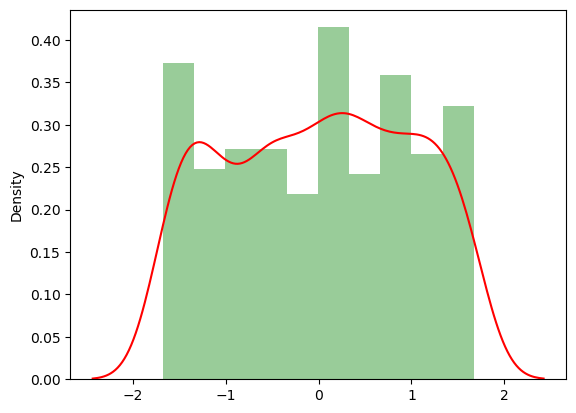

In [42]:
StdND_graph(dataset['panel_age'])

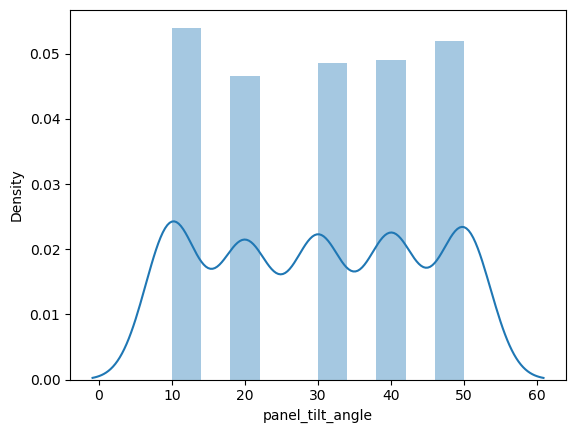

In [43]:
sns.distplot(dataset['panel_tilt_angle'])

Mean=29.940,StandardDeviation=14.422
The area between range(10,50):83.44745952974696


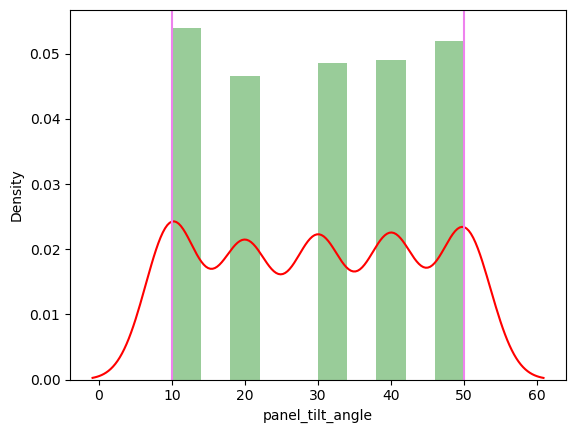

In [44]:
get_pdf_probability(dataset['panel_tilt_angle'],10,50)

In [45]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['panel_tilt_angle'])
ecdf(30)

0.596

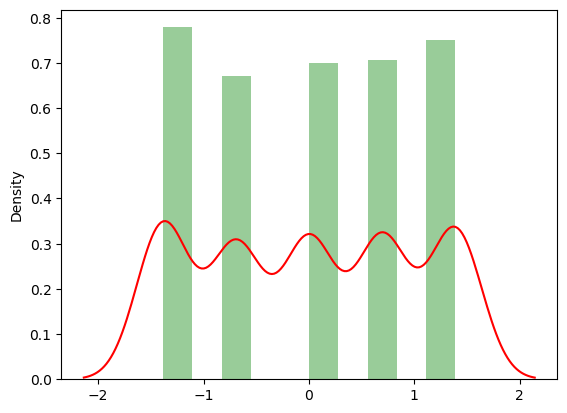

In [46]:
StdND_graph(dataset['panel_tilt_angle'])

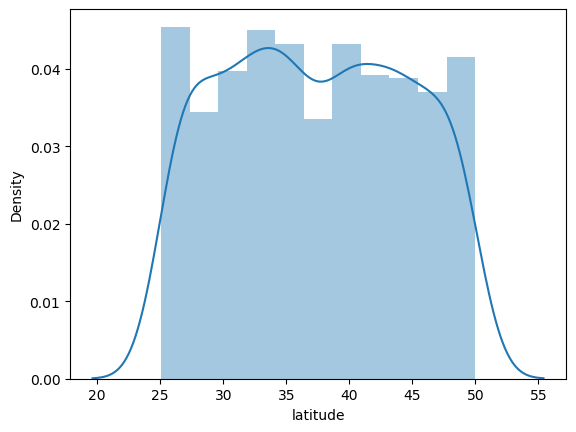

In [47]:
sns.distplot(dataset['latitude'])

Mean=37.377,StandardDeviation=7.196
The area between range(25,50):91.76015219344025


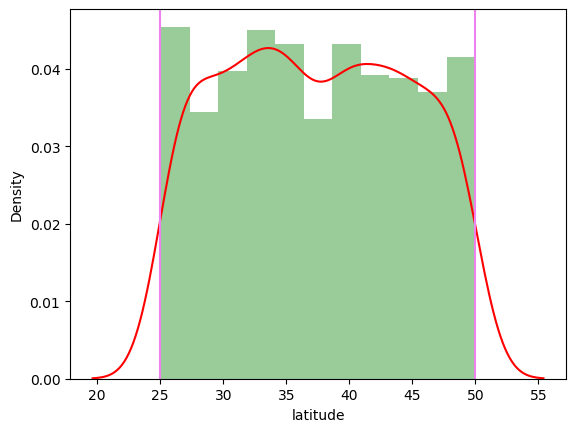

In [48]:
get_pdf_probability(dataset['latitude'],25,50)

In [49]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['latitude'])
ecdf(40)

0.607

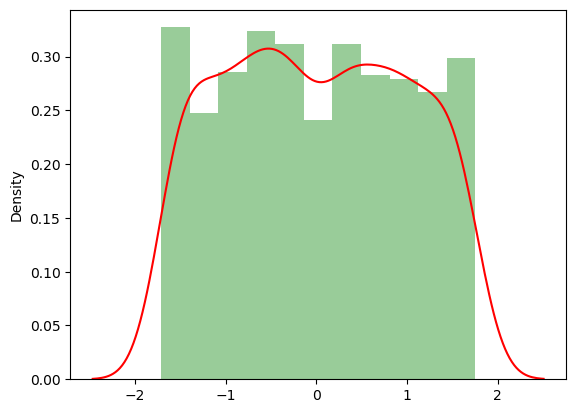

In [50]:
StdND_graph(dataset['latitude'])

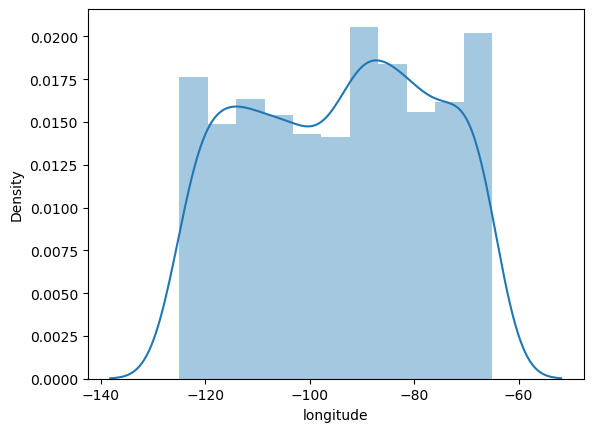

In [51]:
sns.distplot(dataset['longitude'])

Mean=-94.258,StandardDeviation=17.538
The area between range(-120,-65):88.12947260806658


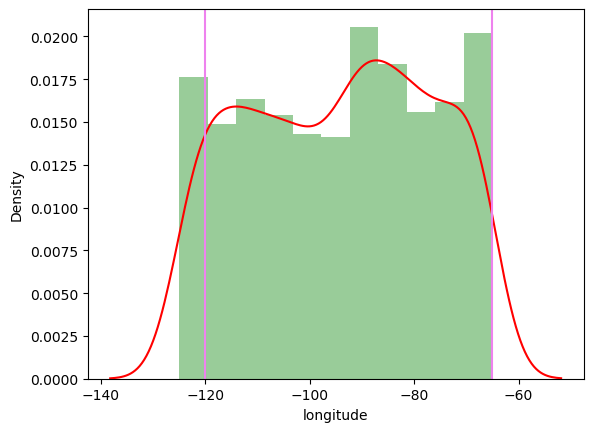

In [52]:
get_pdf_probability(dataset['longitude'],-120,-65)

In [53]:
#Cumulative Density Function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['longitude'])
ecdf(-100)

0.397

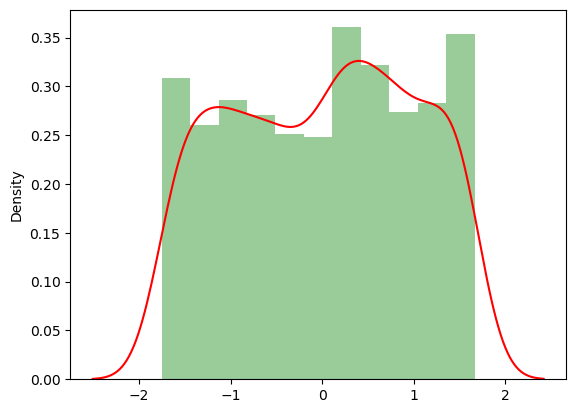

In [54]:
StdND_graph(dataset['longitude'])